| Date | Person | Change |
| :- | :- | :--------: |
04/26/2019  |  L. Hunt  |  <ul><li>laigle Suggested to use apterture photometry with correction</li><li>This is just playing around to see how different aperture is from auto mag</li></ul>

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations

In [2]:
import astropy as ap
from astropy import units as u
from astropy.coordinates import SkyCoord
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table

In [3]:
import os
import matplotlib.pyplot as plt

In [4]:
cosmo=FlatLambdaCDM(H0=70,Om0=0.3)

In [5]:
kcordir=os.environ["KCORRECT_DIR"]
catbasedir=os.environ["COSMOS_DIR"]

In [6]:
laigle_table=Table.read(catbasedir+'/Photometry/COSMOS2015_Laigle_v1.1.fits')
initial_laigle_df=laigle_table.to_pandas()

/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'ID_XMM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'ID_CHANDRA09' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'FLAG_XRAYBLEND' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
for x in initial_laigle_df.columns.values:
    print(x)

ALPHA_J2000
DELTA_J2000
NUMBER
X_IMAGE
Y_IMAGE
ERRX2_IMAGE
ERRY2_IMAGE
ERRXY_IMAGE
FLAG_HJMCC
FLUX_RADIUS
KRON_RADIUS
EBV
FLAG_PETER
FLAG_COSMOS
FLAG_DEEP
FLAG_SHALLOW
Ks_FLUX_APER2
Ks_FLUXERR_APER2
Ks_FLUX_APER3
Ks_FLUXERR_APER3
Ks_MAG_APER2
Ks_MAGERR_APER2
Ks_MAG_APER3
Ks_MAGERR_APER3
Ks_MAG_AUTO
Ks_MAGERR_AUTO
Ks_MAG_ISO
Ks_MAGERR_ISO
Ks_FLAGS
Ks_IMAFLAGS_ISO
Y_FLUX_APER2
Y_FLUXERR_APER2
Y_FLUX_APER3
Y_FLUXERR_APER3
Y_MAG_APER2
Y_MAGERR_APER2
Y_MAG_APER3
Y_MAGERR_APER3
Y_MAG_AUTO
Y_MAGERR_AUTO
Y_MAG_ISO
Y_MAGERR_ISO
Y_FLAGS
Y_IMAFLAGS_ISO
H_FLUX_APER2
H_FLUXERR_APER2
H_FLUX_APER3
H_FLUXERR_APER3
H_MAG_APER2
H_MAGERR_APER2
H_MAG_APER3
H_MAGERR_APER3
H_MAG_AUTO
H_MAGERR_AUTO
H_MAG_ISO
H_MAGERR_ISO
H_FLAGS
H_IMAFLAGS_ISO
J_FLUX_APER2
J_FLUXERR_APER2
J_FLUX_APER3
J_FLUXERR_APER3
J_MAG_APER2
J_MAGERR_APER2
J_MAG_APER3
J_MAGERR_APER3
J_MAG_AUTO
J_MAGERR_AUTO
J_MAG_ISO
J_MAGERR_ISO
J_FLAGS
J_IMAFLAGS_ISO
B_FLUX_APER2
B_FLUXERR_APER2
B_FLUX_APER3
B_FLUXERR_APER3
B_MAG_APER2
B_MAGERR_APER2
B

In [14]:
initial_laigle_df['corrected_B']=initial_laigle_df['B_MAG_APER3']+initial_laigle_df['OFFSET']-0.146

(-10, 10)

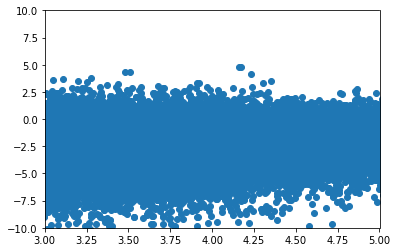

In [35]:
plt.scatter(initial_laigle_df.loc[initial_laigle_df.TYPE==0,'ZPDF'],initial_laigle_df.loc[initial_laigle_df.TYPE==0,'B_MAG_APER3']-initial_laigle_df.loc[initial_laigle_df.TYPE==0,'B_MAG_AUTO'])
plt.xlim(3,5)
plt.ylim(-10,10)

In [34]:
(initial_laigle_df.iloc[0].B_MAG_AUTO-initial_laigle_df.iloc[0].B_MAG_APER3)/(initial_laigle_df.iloc[0].B_MAGERR_APER3**2+initial_laigle_df.iloc[0].B_MAGERR_AUTO**2)

2.0589328225813066